# Collect images from Gouwens and Scala datasets

In [1]:
# Python imports
import glob
import os
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Morphology visualization imports
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.constants import AXON, BASAL_DENDRITE, SOMA

In [5]:
# Plot morphology from SWC file
# def plot_morphology(file, output_name=None):
#     morph = morphology_from_swc(file)
    
#     axon_nodes = morph.get_node_by_types([AXON])
#     dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
#     soma_nodes = morph.get_node_by_types([SOMA])

#     axon_x = [node['x'] for node in axon_nodes]
#     axon_y = [node['y'] for node in axon_nodes]

#     dend_x = [node['x'] for node in dend_nodes]
#     dend_y = [node['y'] for node in dend_nodes]

#     soma_x = [node['x'] for node in soma_nodes]
#     soma_y = [node['y'] for node in soma_nodes]


#     plt.figure(figsize=(10, 10))

#     plt.scatter(axon_x, axon_y, s=1, edgecolor="none")
#     plt.scatter(dend_x, dend_y, s=1, edgecolor="none")
#     plt.scatter(soma_x, soma_y, s=20, c="black", edgecolor="none")

#     plt.gca().set(xticks=[], yticks=[])
#     plt.gca().set_aspect("equal")
#     sns.despine(left=True, bottom=True)
#     if output_name:
#         plt.savefig(output_name)
#         plt.close()

# Modified plotting function to highlight dendrite and soma

def plot_morphology(file, output=None):
    morph = morphology_from_swc(file)

    axon_nodes = morph.get_node_by_types([AXON])
    dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
    soma_nodes = morph.get_node_by_types([SOMA])

    axon_x = [node['x'] for node in axon_nodes]
    axon_y = [node['y'] for node in axon_nodes]

    dend_x = [node['x'] for node in dend_nodes]
    dend_y = [node['y'] for node in dend_nodes]

    soma_x = [node['x'] for node in soma_nodes]
    soma_y = [node['y'] for node in soma_nodes]

    plt.ioff()
    fig = plt.figure(figsize=(10, 10))

    plt.scatter(axon_x, axon_y, s=1, edgecolor="none")
    plt.scatter(dend_x, dend_y, s=5, c='r', edgecolor="none")
    plt.scatter(soma_x, soma_y, s=70, c="black", edgecolor="none")

    plt.gca().set(xticks=[], yticks=[])
    plt.gca().set_aspect("equal")
    sns.despine(left=True, bottom=True)
    if output:
        plt.savefig(output)
    else:
        plt.savefig(f"./gouwens-data/modified_images/{os.path.basename(file)[:9]}.png")
    plt.close(fig)

# Gouwens Data

In [4]:
metadata_gouwens = pd.read_csv("./gouwens-data/metadata_gouwens.csv")

In [5]:
# Collect images with labels
gouwens_cells = [os.path.splitext(os.path.basename(i))[0] for i in glob.glob("./gouwens-data/images/*.png")]
len(gouwens_cells)

537

In [6]:
# Gather t-type for cells
metadata_gouwens = metadata_gouwens[["cell_specimen_id", "corresponding_AIT2.3.1_alias"]]
metadata_gouwens = metadata_gouwens[metadata_gouwens["cell_specimen_id"].isin(gouwens_cells)]
metadata_gouwens = metadata_gouwens[metadata_gouwens["corresponding_AIT2.3.1_alias"] != " NA"]
metadata_gouwens.columns = ["cell_id", "t-type"]
metadata_gouwens["dataset"] = "gouwens"
metadata_gouwens

,cell_id,t-type,dataset
0,601506507,Vip Gpc3,gouwens
1,601790961,Sst Tac2,gouwens
2,601803754,Sst Calb2,gouwens
3,601808698,Sst Hpse,gouwens
4,601810307,Sst Calb2,gouwens
...,...,...,...
4310,741796557,Sst Myh8,gouwens
4317,741940660,Sst Mme,gouwens
4322,741788179,Sst Tac1,gouwens
4326,742009621,Sst Mme,gouwens


cell_id    841834394
t-type     Sst Calb2
dataset      gouwens
Name: 169, dtype: object


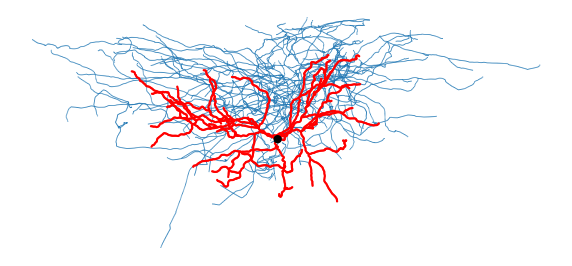

In [34]:
cell = metadata_gouwens.iloc[20]['cell_id']
file = f"./gouwens-data/data/{cell}_transformed.swc"
morph = morphology_from_swc(file)
    
axon_nodes = morph.get_node_by_types([AXON])
dend_nodes = morph.get_node_by_types([BASAL_DENDRITE])
soma_nodes = morph.get_node_by_types([SOMA])

axon_x = [node['x'] for node in axon_nodes]
axon_y = [node['y'] for node in axon_nodes]

dend_x = [node['x'] for node in dend_nodes]
dend_y = [node['y'] for node in dend_nodes]

soma_x = [node['x'] for node in soma_nodes]
soma_y = [node['y'] for node in soma_nodes]


plt.figure(figsize=(10, 10))

plt.scatter(axon_x, axon_y, s=1, edgecolor="none")
plt.scatter(dend_x, dend_y, s=5, c='r', edgecolor="none")
plt.scatter(soma_x, soma_y, s=70, c="black", edgecolor="none")

plt.gca().set(xticks=[], yticks=[])
plt.gca().set_aspect("equal")
sns.despine(left=True, bottom=True)

In [39]:
def collect_morph_images(files):
    fail_count = 0
    processed = 0
    for file in files:
        processed += 1
        if processed % 50 == 0:
            print(f"Processed {processed} images.")
        try:
            plot_morphology(file)
        except:
            fail_count += 1
    print(f"Collected 2D morphology images from {len(files) - fail_count} cells.")

In [54]:
# swc_files = glob.glob("./gouwens-data/data/*_transformed.swc")
swc_files = [f"./gouwens-data/data/{row['cell_id']}_transformed.swc" for _, row in metadata_gouwens.iterrows()]
collect_morph_images(swc_files)

Processed 50 images.
Processed 100 images.
Processed 150 images.
Processed 200 images.
Processed 250 images.
Processed 300 images.
Processed 350 images.
Processed 400 images.
Processed 450 images.
Collected 2D morphology images from 476 cells.


# Scala Data

In [4]:
metadata_scala = pd.read_csv("./scala-data/metadata_scala.csv", index_col=0)

In [6]:
# Generate images
def collect_morph_images(files):
    fail_count = 0
    processed = 0
    for file in files:
        processed += 1
        if processed % 50 == 0:
            print(f"Processed {processed} images.")
        try:
            name = os.path.splitext(os.path.basename(file))[0]
            plot_morphology(file, f"./scala-data/inhibitory/images/{name}.png")
        except:
            fail_count += 1
    print(f"Collected 2D morphology images from {len(files) - fail_count} cells.")
    print(f"Failed on {fail_count} cells.")

In [7]:
# Generate images for swc files in Scala dataset
scala_swc_files = glob.glob("./scala-data/inhibitory/preprocessed/*.swc")
collect_morph_images(scala_swc_files)

Processed 50 images.
Processed 100 images.
Processed 150 images.
Processed 200 images.
Processed 250 images.
Processed 300 images.
Processed 350 images.
Collected 2D morphology images from 371 cells.
Failed on 0 cells.


In [34]:
# Collect images with labels
scala_cells = [os.path.splitext(os.path.basename(i))[0] for i in glob.glob("./scala-data/inhibitory/images/*.png")]
len(scala_cells)

371

In [36]:
metadata_scala = metadata_scala[["Cell", "corresponding_AIT2.3.1_alias"]]
metadata_scala = metadata_scala[metadata_scala["Cell"].isin(scala_cells)]
metadata_scala = metadata_scala[metadata_scala["corresponding_AIT2.3.1_alias"] != " NA"]
metadata_scala.columns = ["cell_id", "t-type"]
metadata_scala["dataset"] = "scala"
metadata_scala

,cell_id,t-type,dataset
392,20180213_sample_5,Pvalb Gpr149,scala
393,20180215_sample_1,Pvalb Reln,scala
396,20180306_sample_1,Pvalb Reln,scala
398,20180327_sample_1,Pvalb Tpbg,scala
400,20180327_sample_4,Pvalb Reln,scala
...,...,...,...
1096,20191107_sample_2,Sst Tac2,scala
1097,20191107_sample_3,Sst Calb2,scala
1098,20191107_sample_4,Sst Hpse,scala
1099,20191114_sample_1,Lamp5 Fam19a1,scala


In [41]:
metadata_combined = pd.concat([metadata_gouwens, metadata_scala], axis=0)
metadata_combined = metadata_combined.reset_index(drop=True)
metadata_combined

,cell_id,t-type,dataset
0,601506507,Vip Gpc3,gouwens
1,601790961,Sst Tac2,gouwens
2,601803754,Sst Calb2,gouwens
3,601808698,Sst Hpse,gouwens
4,601810307,Sst Calb2,gouwens
...,...,...,...
794,20191107_sample_2,Sst Tac2,scala
795,20191107_sample_3,Sst Calb2,scala
796,20191107_sample_4,Sst Hpse,scala
797,20191114_sample_1,Lamp5 Fam19a1,scala


In [43]:
metadata_combined.to_csv("./combined-data/combined_metadata.csv")

In [10]:
metadata = pd.read_csv("./combined-data/combined_metadata.csv", index_col=0)
metadata

,cell_id,t-type,dataset
0,601506507,Vip Gpc3,gouwens
1,601790961,Sst Tac2,gouwens
2,601803754,Sst Calb2,gouwens
3,601808698,Sst Hpse,gouwens
4,601810307,Sst Calb2,gouwens
...,...,...,...
794,20191107_sample_2,Sst Tac2,scala
795,20191107_sample_3,Sst Calb2,scala
796,20191107_sample_4,Sst Hpse,scala
797,20191114_sample_1,Lamp5 Fam19a1,scala


In [11]:
# Get significant t-types with more than 10 cells
counts = metadata["t-type"].value_counts()
sig_cell_types = counts[counts >= 10].to_dict()
sig_cell_types

{'Pvalb Reln': 87,
 'Sst Calb2': 69,
 'Sst Hpse': 60,
 'Lamp5 Lsp1': 38,
 'Pvalb Tpbg': 35,
 'Pvalb Sema3e': 34,
 'Vip Crispld2': 33,
 'Sst Rxfp1': 28,
 'Sst Tac1': 28,
 'Lamp5 Plch2': 22,
 'Sst Chodl': 21,
 'Vip Lmo1': 21,
 'Sst Nts': 19,
 'Sst Crhr2': 19,
 'Sst Tac2': 19,
 'Pvalb Gpr149': 18,
 'Sncg Vip': 18,
 'Pvalb Akr1c18': 18,
 'Sst Esm1': 17,
 'Vip Ptprt': 17,
 'Vip Lect1': 15,
 'Pvalb Vipr2': 14,
 'Sst Mme': 14,
 'Lamp5 Fam19a1': 13,
 'Sst Nr2f2': 13,
 'Sst Myh8': 13,
 'Sst Chrna2': 12,
 'Vip Pygm': 11}

In [12]:
print(len(sig_cell_types))
np.sum(list(sig_cell_types.values()))

28


726

In [13]:
# Save cells within significant t-types
sig_cell_ids = list(metadata[metadata["t-type"].isin(sig_cell_types)]["cell_id"])
len(sig_cell_ids)

726

In [14]:
sig_cell_ids[500]

'20190108_sample_1'

In [15]:
# Gather images from cells within significant t-types
for cnt, cell in enumerate(sig_cell_ids):
    # Gouwens
    if len(cell) == 9:
        src = f"./gouwens-data/images/{cell}.png"
        continue
    else:
        src = f"./scala-data/inhibitory/images/{cell}.png"
    dst = f"./combined-data/images/{cell}.png"
    shutil.copy(src, dst)
    if (cnt > 0 and cnt % 50 == 0):
        print(f"Copied {cnt} files.")

Copied 450 files.
Copied 500 files.
Copied 550 files.
Copied 600 files.
Copied 650 files.
Copied 700 files.


In [72]:
metadata_filtered = metadata[metadata["t-type"].isin(sig_cell_types)]
metadata_filtered = metadata_filtered.reset_index(drop=True)
metadata_filtered.to_csv("./combined-data/combined_metadata_filtered.csv")